# <center>MO444 - Aprendizado de Máquina e Reconhecimento de Padrões</center>
## <center>Primeiro semestre de 2021</center>
## <center>Projeto 2: Regressão e Classificação</center>
## <center>Discentes: Elisa Dell'Arriva (135551) e Felipe de Carvalho Pereira (230214)</center>
_________________________________________________________________________

# 1 Introdução

O presente *notebook* consiste no segundo projeto avaliativo da disciplina MO444 - Aprendizado de Máquina e Reconhecimento de Padrões, ministrada pela Profa. Dra. Esther Colombini. O principal objetivo da atividade foi o de implementar e experimentar métodos de aprendizado de máquina para resolver tarefas de classificação e regressão.<br>

Na primeira parte do projeto, descrita na Seção 2, implementamos um algoritmo de regressão linear e polinomial com uso da técnica denominada *gradiente descendente*. Em seguida, aplicamos esse algoritmo para cada um dos dois *datasets* fornecidos e analisamos os resultados obtidos.

Na segunda etapa, descrita na Seção 3, aplicamos os algoritmos de *Support Vector Machine(SVM)*, o SVC, e *k-nearrest neighbosr (KNN)* para realizar uma tarefa de classificação de dígitos de 0 a 9, escritos à mão. Analisamos os resultados obtidos com cada algoritmo, bem como o impacto da normalização das amostras na etapa de pré-processamento dos dados.


# 2 *Parte $I$ - Tarefa de Regressão*

Nesta tarefa, almejamos aplicar métodos de regressão linear e polinomial para prever a trajetória de uma bola de futebol atingida por um chute. Inicialmente, considere que temos uma sequência de pontos no espaço 3-dimensional, de maneira que tais pontos representam as primeiras posições da bola a partir de um certo instante de tempo. Para cada uma das dimensões ($X, Y$ e $Z$), encontramos equações que explicam a trajetória da bola para os pontos fornecidos em função do tempo. Em seguida, utilizamos tais equações para extrapolar as informações já conhecidas e deduzir a continuação da trajetória da bola.

Junto à especificação do projeto, foram disponibilizados dois *datasets*, denominados kick1 e kick2. Em ambos os *datasets* temos 20 linhas. Cada linha descreve os valores das 3 coordenadas da bola no instante de tempo em que a captura foi feita. De acordo com a especificação, as capturas foram feitas com uma taxa de 60 *frames* por segundo. Assumiremos que os pontos descritos foram capturados de maneira sequencial a partir do instante de tempo em que o chute foi desferido.

A seguir, apresentamos o nosso algoritmo de regressão linear e polinomial, o qual foi baseado no método gradiente descendente, visto em aula. Dizemos que um polinômio *descreve* um conjunto de planos no ponto cartesiano, se a curva produzida por esse polinômio se aproxima dos pontos dispostos no plano. Suponha que desejamos obter uma equação polinomial de grau $n \geq 1$ representada por $f(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \dots + \theta_n x^n$ que descreve um conjunto de pontos fornecido.

Denote por $x_i$ e $y_i$ as coordenadas do $i$-ésimo ponto, entre os $m$ pontos anotados. Seja $J(\theta_0, \dots, \theta_n) = \dfrac{1}{2m} \cdot \sum_{i = 1}^m (f(x_i) - y_i)^2$ a função de custo (*squared error function*) dos coeficientes $\theta_0, \theta_1, \dots, \theta_n$ em relação aos $m$ pontos. Nosso objetivo é encontrar valores para os coeficientes que minimizam $J(\theta_0, \dots, \theta_n)$. Suponha que, inicialmente, o valor do coeficiente $\theta_k$ é arbitrário para todo $k \in \{0,1,2, \dots, n\}$. Além disso, assuma que o algoritmo recebe dois parâmetros: $\alpha$ (*taxa de aprendizado*) e $\beta$ (*valor de tolerância*). Em cada iteração do algoritmo, fazemos o que segue.

Primeiramente, salvamos os valores dos coeficientes fazendo $\mu_k \leftarrow \theta_k$ para todo $k \in \{0,1,2, \dots, n\}$. Em seguida, para cada coeficiente $\theta_k$, calculamos $t_k \leftarrow \theta_k - \alpha \cdot \dfrac{\partial}{\partial \theta_k} J(\theta_0, \dots, \theta_n)$. Depois, fazemos $\theta_k \leftarrow t_k$ para cada $k \in \{0,1,2, \dots, n\}$.

O procedimento do parágrafo acima é repetido até que tenhamos $|t_k - \mu_k| < \beta$ para todo $k \in \{0,1,2, \dots, n\}$. Quando isso ocorre, significa que a mudança em cada coeficiente foi menor do que a tolerância adotada e, portanto, consideramos que o algoritmo convergiu para um valor suficientemente próximo de um mínimo local e encerramos o processo.

Note que, de acordo com o que vimos em aula, $\dfrac{\partial}{\partial \theta_k} J(\theta_0, \dots, \theta_n) = \dfrac{1}{m} \cdot \sum_{i = 1}^{m}(f(x_i) - y_i) \cdot x_{i}^{k}$. Além disso, observe que se $n = 1$, então trata-se do caso especial em que obtemos uma regressão linear.

Adiante, temos o código-fonte relativo à Parte $I$ do projeto.

In [1]:
# Importação de módulos
import numpy as np
import pandas as pd
import random
import statistics
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

In [2]:
# Plota um conjunto de pontos 2D fornecido e
# um conjunto de pontos produzidos por uma função polinomial (regressão) em um dado intervalo.
def plot_2D_regression(x_points, y_points, min_input, max_input, coefficients_array, label_x, label_y):
    
    # Plota, em azul, os pontos dados na entrada.
    plt.scatter(x_points, y_points, color="blue")
    
    # Plota a função polinomimial, em vermelho, de acordo com o array de coeficientes dado na entrada.
    x_line_points = np.linspace(min_input, max_input,100) # Toma as coordenadas x dos pontos produzidos pelo polinômio.
    y_line_points = np.zeros(100)
    for i in range(coefficients_array.size): #Calcula as coordenadas y dos pontos produzidos pelo polinômio.
        y_line_points += coefficients_array[i]*(x_line_points**i)
    plt.plot(x_line_points, y_line_points, '-o', color='red', linewidth=1, markersize=0) #Plota os pontos produzidos pelo polinômio.
    plt.grid(linestyle='--')
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.show()
    plt.close()

# Plota um conjunto de pontos 3D fornecido e
# um conjunto de pontos 3D produzidos pela combinação de três funções polinomiais (regressões).
# Cada função polinomial calcula uma coordenada de um ponto, tendo como variável livre o tempo.
def plot_3D_regression(x_points, y_points, z_points, coefficients_array_X, coefficients_array_Y, coefficients_array_Z):
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    
    # Plota, em azul, os pontos dados na entrada e suas projeções nos planos, em cinza. 
    ax.scatter3D(x_points, y_points, z_points, color='blue')
    ax.scatter(x_points, y_points, np.zeros(z_points.size), color='gray')
    ax.scatter(x_points, np.array([2]*y_points.size), z_points, color='gray')
    ax.scatter(np.array([-3]*x_points.size), y_points, z_points, color='gray')
    
    # Configura os limites do plot para cada dimensão.
    ax.set_xlim3d(-3, 3) # Limites da dimensão X.
    ax.set_ylim3d(0, 2.1) # Limites da dimensão Y.
    ax.set_zlim3d(0.005, 0.3) # Limites da dimensão Z.
    
    # Calcula a raiz da equação polinomial que prevê a coordenada y, ou seja,
    # calcula em que instante de tempo teremos y = 0, momento em que a bola chega na linha de fundo.
    root_y = max(np.roots(np.flip(coefficients_array_Y)))
    
    # Obtém 100 time stamps no intervalo do instante de tempo 0 até o instante de tempo em que y = 0.
    time_stamps = np.linspace(0, root_y, 100)
    
    # Prediz as coordenadas dos pontos produzidos pela regressão
    # para cada timestamp, de acordo com cada uma das três funções polinomiais.
    x_line_points = np.zeros(100)
    y_line_points = np.zeros(100)
    z_line_points = np.zeros(100)
    for i in range(coefficients_array_X.size):
        x_line_points += coefficients_array_X[i]*(time_stamps**i)
    for i in range(coefficients_array_Y.size):
        y_line_points += coefficients_array_Y[i]*(time_stamps**i)
    for i in range(coefficients_array_Z.size):
        z_line_points += coefficients_array_Z[i]*(time_stamps**i)

    # Plota, em vermelho, a regressão 3D em e a projeção da regressão em cada plano, em cinza.
    ax.plot3D(x_line_points, y_line_points, z_line_points, color='red')
    ax.plot(x_line_points, y_line_points, np.zeros(z_line_points.size), color='gray')
    ax.plot(x_line_points, np.array([2]*y_line_points.size), z_line_points, color='gray')
    ax.plot(np.array([-3]*x_line_points.size), y_line_points, z_line_points, color='gray')
    
    # Configura legenda e posição da visualização.
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(20, -60)
    plt.gcf().set_dpi(110)
    plt.show()
    plt.close()
    
# Retorna o valor do polinômio f(x) para uma entrada x, dados os coeficientes do polinômio f(x).
def get_hypothesis_value(coefficients_array, x):
    hypothesis_value = 0
    for i in range(coefficients_array.size):
        hypothesis_value += coefficients_array[i]*(x**i)
    return hypothesis_value

# Retorna um array com os valores do polinômio f(x) para um conjunto de valores de entrada,
# dados os coeficientes do polinômio f(x).
def get_hypothesis_values_array(coefficients_array, input_values):
    hypothesis_values_array = np.empty(input_values.size)
    for i in range(input_values.size):
        hypothesis_values_array[i] = get_hypothesis_value(coefficients_array, input_values[i])
    return hypothesis_values_array

# Retorna um array com os valores das derivadas parciais em relação
# a cada coeficiente de um polinômio f(x), considerando os parâmetros:
# os valores de entrada;
# os valores esperados (anotados) de saída para cada elemento dos valores de entrada;
# os coeficientes do polinômio f(x);
# os valores do polinômio f(x) para um conjunto de valores de entrada.
def get_partial_derivatives_array(coefficients_array, hypothesis_values_array, input_values, output_values):
    
    # Array que contém as diferenças entre os valores de saída esperados (anotados) e os valores
    # produzidos pelo polinômio (valores da hipótese) para os elementos da entrada.
    diference_values_array = np.empty(input_values.size)
    for i in range(input_values.size):
        diference_values_array[i] = hypothesis_values_array[i] - output_values[i]
    
    # Array conténdo os valores das derivadas parciais em relação a cada coeficiente,
    # de acordo com a fórmula descrita no início dessa Seção.
    partial_derivatives_array = np.zeros(coefficients_array.size)
    for i in range(input_values.size): # Para cada valor da entrada
        auxiliar_variable = diference_values_array[i] # Toma a diferença entre o valor da hipótese e o valor esperado.
        for j in range(coefficients_array.size): #  Para cada coeficiente do polinômio.
            auxiliar_variable += auxiliar_variable*input_values[i] # Toma a diferença vezes o valor da entrada elevado ao índice do coeficiente (observe que nós reaproveitamos a variável auxiliar, ao multiplicá-la novamente pelo valor de entrada, obtendo uma potência maior do valor de entrada em cada iteração).)
            partial_derivatives_array[j] += auxiliar_variable # Soma na célula que armazena a derivada parcial do j-ésimo coeficiente.
    for i in range(coefficients_array.size): # Divide cada célula do array de derivadas parciais pela quantidade de valores de entrada.
        partial_derivatives_array[i] = partial_derivatives_array[i]/input_values.size

    return partial_derivatives_array # Retorna um array contendo os valores das derivadas parciais.

# Atualiza o array de coeficientes do polinômio a partir da taxa de apredizando e das derivadas parciais.
def update_coefficients_array(coefficients_array, partial_derivatives_array, learning_rate):
    for i in range(coefficients_array.size):
        coefficients_array[i] = coefficients_array[i] - learning_rate*partial_derivatives_array[i]

# Retorna um array de coeficientes de um polinômio de grau 'degree' (regressão) utilizando o método do gradiente descendente.
def get_regression(input_values, output_values, degree, learning_rate, tolerance):
    
    # Array contendo 'degree+1' coeficientes do polinomio de grau 'degree'.
    # inicialmente todos os coeficientes são iguais a zero.
    coefficients_array = np.zeros(degree+1) 
    
    iteration = 1 # Contador de iterações.
    
    while(True): # Enquanto o laço não for internamente interrompido faça.
        old_coefficients_array = coefficients_array.copy() # Salva os coeficientes atuais.
        hypothesis_values_array = get_hypothesis_values_array(coefficients_array, input_values) # Obtém os valores produzidos pelo polinômio (hipótese).
        partial_derivatives_array = get_partial_derivatives_array(coefficients_array, hypothesis_values_array, input_values, output_values) # Calcula o array de derivadas em relação aos coeficientes atuais do polinômio.
        update_coefficients_array(coefficients_array, partial_derivatives_array, learning_rate) # Atualiza os coeficientes.
        if max(abs(coefficients_array - old_coefficients_array)) < tolerance: # Se nenhuma mudança nos coeficientes foi maior ou igual a tolerância, então encerra o laço.
            break
        iteration += 1
    
    return coefficients_array, iteration # Retorna o array de coeficientes e o número total de iterações.

# Retorna o valor do MSE de uma regressão.
def get_MSE(coefficients_array, input_values, output_values):
    hypothesis_values_array = get_hypothesis_values_array(coefficients_array, input_values)
    mse = 0
    for i in range(hypothesis_values_array.size):
        mse = mse + (hypothesis_values_array[i] - output_values[i])**2
    mse = mse/hypothesis_values_array.size
    return mse

Deste ponto em diante, conduzimos os experimentos com os *datasets* kick1 e kick2 nas Seções 2.1 e 2.2, respectivamente. Começamos fazendo o que segue para o kick1 (Seção 2.1).

Primeiramente, para cada dimensão $(X, Y$ e $Z)$, obtemos uma regressão linear e uma regressão polinomial de grau 2 capazes de predizer a posição da bola, naquela dimensão, em função do tempo. Em cada caso, analisamos a qualidade de predição através do cálculo do *mean squared error* (MSE) e escolhemos a melhor regressão para cada dimensão de acordo com essa métrica.

Usando as três regressões escolhidas, uma para cada dimensão, predizemos a continuação da trajetória da bola no espaço 3-dimensional até o momento em que ela atinge a linha de fundo, isto é, quanto $y = 0$. No instante de tempo em que isso acontece, verificamos as outras coordenadas da bola e analisamos se o goleiro defende ou não a bola. Na Seção 2.2, repetimos esse procedimento, mas para o *dataset* kick2.

A Seção 2.3 é dedicada à verificação do impacto de utilizar diferentes valores para a taxa de aprendizado $(\alpha)$. Observe que os valores de $\alpha$ utilizados nas Seções 2.1 e 2.2 foram escolhidos através de testagem prévia realizada pela dupla. A Seção 2.3 separa a análise de impacto de $\alpha$ das demais seções com o intuito de simplificar a leitura e compressão das Seções 2.1 e 2.2, tornando-as menos densas.

Observações:
* Em todas as execuções do nosso algoritmo, inicialmente todos os coeficientes são iguais a zero (vide função *get_regression*);
* Utilizamos a estratégia *batch* em nosso algoritmo, isto é, cada iteração do gradiente descendente usa todos os pontos do conjunto de treinamento.

## 2.1 *Dataset* kick1

Primeiramente, carregamos os 20 pontos fornecidos no arquivo kick1.dat. Como cada ponto foi capturado sequencialmente a cada 1/60 segundo, a partir do instante de tempo 0, armazenamos os *timestamps* dos 20 primeiros pontos do kick1 no vetor *time_stamps*. As coordenadas $x, y$ e $z$ desses 20 pontos são armazenadas nos vetores *output_values_X*, *output_values_Y* e *output_values_Z*.

In [3]:
df = pd.read_table("kick1.dat", sep=' ', header=None).to_numpy()
time_stamps = np.linspace(0,(1/60)*19,20)
output_values_X = df[:,0]
output_values_Y = df[:,1]
output_values_Z = df[:,2]

Inicialmente, determinamos os valores dos parâmetros do nosso algoritmo. 

In [4]:
learning_rate = 0.95
tolerance = 0.00001

Em seguida, obtemos duas regressões para explicar as coordenadas $x$ dos 20 pontos do kick1. A primeira delas é uma regressão linear.

In [5]:
degree = 1
coefficients_array_X_linear, n_iterations = get_regression(time_stamps, output_values_X, degree, learning_rate, tolerance)

Abaixo, temos: a descrição da equação (com variável livre $t$); o valor MSE da regressão; e o *plot* da regressão.

Equação: f(t) = (-0.258917024016695) + (-2.961354431263971)*t
Valor do MSE: 0.0007186772502949979


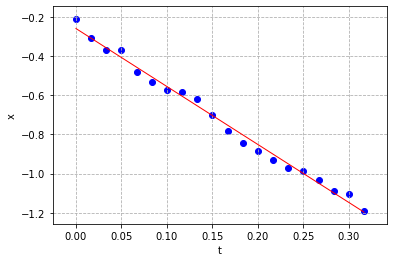

In [6]:
print("Equação: f(t) = (" + str(coefficients_array_X_linear[0]) + ") + (" + str(coefficients_array_X_linear[1]) + ")*t")
print("Valor do MSE: " + str(get_MSE(coefficients_array_X_linear, time_stamps, output_values_X)))
plot_2D_regression(time_stamps, output_values_X, 0, (1/60)*19, coefficients_array_X_linear, "t", "x")

Repetimos o procedimento acima, mas obtendo uma equação de segundo grau.

Equação: f(t) = (-0.23369339442872641) + (-3.441847759248485)*t + (1.4848305588832778)*t^2
Valor do MSE: 0.0005212829251964849


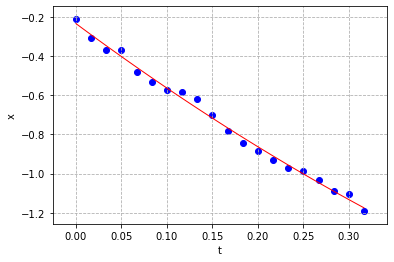

In [7]:
degree = 2
coefficients_array_X_poly, n_iterations = get_regression(time_stamps, output_values_X, degree, learning_rate, tolerance)
print("Equação: f(t) = (" + str(coefficients_array_X_poly[0]) + ") + (" + str(coefficients_array_X_poly[1]) + ")*t + (" + str(coefficients_array_X_poly[2]) + ")*t^2")
print("Valor do MSE: " + str(get_MSE(coefficients_array_X_poly, time_stamps, output_values_X)))
plot_2D_regression(time_stamps, output_values_X, 0, (1/60)*19, coefficients_array_X_poly, "t", "x")

Observe que embora ambas as equações estejam aparentemente bem ajustadas à distribuição dos pontos, **a equação de segundo grau** apresentou valor de MSE ligeiramente menor que a equação linear. Por essa razão, escolhemos **a equação de segundo grau para predizer a trajetória na coordenada $x$**.

Agora, repetiremos esse procedimento para a dimensão $Y$. Primeiro obtemos uma equação linear.

Equação: f(t) = (2.0502736708551885) + (-2.991397946824788)*t
Valor do MSE: 0.00011480003601208883


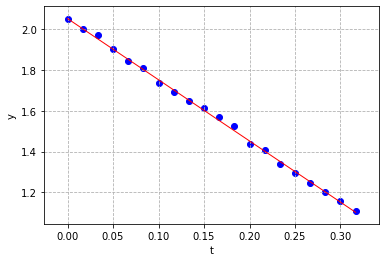

In [8]:
degree = 1
coefficients_array_Y_linear, n_iterations = get_regression(time_stamps, output_values_Y, degree, learning_rate, tolerance)
print("Equação: f(t) = (" + str(coefficients_array_Y_linear[0]) + ") + (" + str(coefficients_array_Y_linear[1]) + ")*t")
print("Valor do MSE: " + str(get_MSE(coefficients_array_Y_linear, time_stamps, output_values_Y)))
plot_2D_regression(time_stamps, output_values_Y, 0, (1/60)*19, coefficients_array_Y_linear, "t", "y")

Agora, obtemos uma equação de segundo grau.

Equação: f(t) = (2.047622208858546) + (-2.938865564602183)*t + (-0.16518062521443866)*t^2
Valor do MSE: 0.00011820151586599008


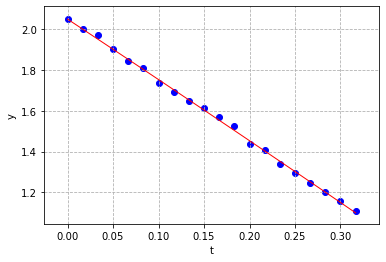

In [9]:
degree = 2
coefficients_array_Y_poly, n_iterations = get_regression(time_stamps, output_values_Y, degree, learning_rate, tolerance)
print("Equação: f(t) = (" + str(coefficients_array_Y_poly[0]) + ") + (" + str(coefficients_array_Y_poly[1]) + ")*t + (" + str(coefficients_array_Y_poly[2]) + ")*t^2")
print("Valor do MSE: " + str(get_MSE(coefficients_array_Y_poly, time_stamps, output_values_Y)))
plot_2D_regression(time_stamps, output_values_Y, 0, (1/60)*19, coefficients_array_Y_poly, "t", "y")

Observe que embora ambas as equações estejam aparentemente bem ajustadas à distribuição dos pontos, **a equação linear** apresentou valor de MSE ligeiramente menor que a equação de segundo grau. Por essa razão, escolhemos **a equação linear para predizer a trajetória na coordenada $y$**.

Agora, repetiremos esse procedimento para a dimensão $Z$. Primeiro obtemos uma equação linear.

Equação: f(t) = (0.12368676163201293) + (-0.026001533999172786)*t
Valor do MSE: 0.0001946710848559621


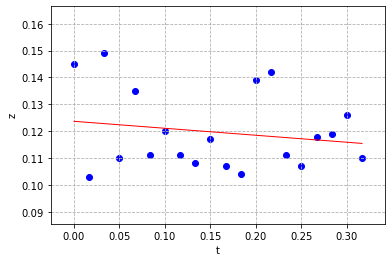

In [10]:
degree = 1
coefficients_array_Z_linear, n_iterations = get_regression(time_stamps, output_values_Z, degree, learning_rate, tolerance)
print("Equação: f(t) = (" + str(coefficients_array_Z_linear[0]) + ") + (" + str(coefficients_array_Z_linear[1]) + ")*t")
print("Valor do MSE: " + str(get_MSE(coefficients_array_Z_linear, time_stamps, output_values_Z)))
plot_2D_regression(time_stamps, output_values_Z, 0, (1/60)*19, coefficients_array_Z_linear, "t", "z")

Agora, obtemos uma equação de segundo grau.

Equação: f(t) = (0.12166376620377486) + (0.012772289259149703)*t + (-0.12014564020723642)*t^2
Valor do MSE: 0.0002018898291151334


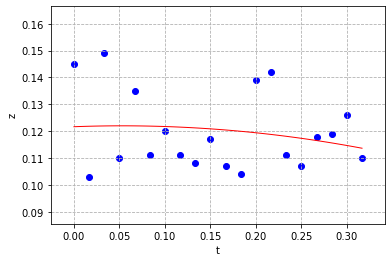

In [11]:
degree = 2
coefficients_array_Z_poly, n_iterations = get_regression(time_stamps, output_values_Z, degree, learning_rate, tolerance)
print("Equação: f(t) = (" + str(coefficients_array_Z_poly[0]) + ") + (" + str(coefficients_array_Z_poly[1]) + ")*t + (" + str(coefficients_array_Z_poly[2]) + ")*t^2")
print("Valor do MSE: " + str(get_MSE(coefficients_array_Z_poly, time_stamps, output_values_Z)))
plot_2D_regression(time_stamps, output_values_Z, 0, (1/60)*19, coefficients_array_Z_poly, "t", "z")

Nesse caso, parece haver bastante ruído na distribuição dos pontos em relação à coordenada $z$ . Observe, por exemplo, que a especificação do projeto afirma que a bola tem diâmetro 21.5 cm e que a captura dos pontos se refere ao centro da bola. Isso implica que a altura (coordenada $z$) mínima que deveríamos ter é 10.75 cm (0.1075 m). Todavia, existem pontos que estão claramente abaixo desse valor. De modo geral, dado o curto intervalo de tempo, o comportamento da bola segundo a distribuição visualizada acima é pouco plausível. Portanto, consideraremos apenas que há bastante ruído na entrada em relação à dimensão $X$ e continuaremos a nossa análise.

**A equação linear** apresentou valor de MSE ligeiramente menor que a equação de segundo grau. Por essa razão, escolhemos **a equação linear para predizer a trajetória na coordenada $z$**.

Portanto, para predizer a dimensão $X$ uma equação de segundo grau foi escolhida, e para predizer as dimensões $Y$ e $Z$ equações lineares foram escolhidas. Utilizaremos as três equações para predizer a trajetória tridimensional da bola desde $t = 0$ até o instante de tempo em que temos $y = 0$. Segue o *plot* da regressão.

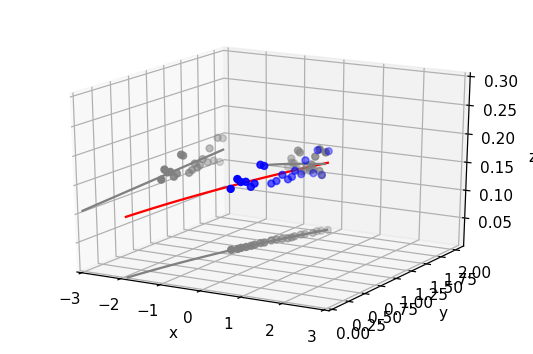

In [12]:
plot_3D_regression(output_values_X, output_values_Y, output_values_Z, coefficients_array_X_poly, coefficients_array_Y_linear, coefficients_array_Z_linear)

Sugundo a predição, o instante de tempo que ocorre $y = 0$ é:

In [13]:
t_max = max(np.roots(np.flip(coefficients_array_Y_linear)))
print("t_max: " + str(t_max))

t_max: 0.6853898101492804


Portanto, as coordenadas da bola nesse instante de tempo são:

In [14]:
print("x: " + str(get_hypothesis_value(coefficients_array_X_poly, t_max)))
print("y: " + str(get_hypothesis_value(coefficients_array_Y_linear, t_max)))
print("z: " + str(get_hypothesis_value(coefficients_array_Z_linear, t_max)))

x: -1.8951879733179775
y: 0.0
z: 0.10586557518072984


Conforme a primeira imagem da especificação do projeto, temos que a largura entre as traves é de aproximadamente 3 metros e sabemos que o goleiro está à mesma distância das traves, isto é, no centro do gol. Vamos assumir que a altura da baliza é de 1 metro e que até o momento de chegada da bola em $y = 0$, o goleiro consegue se mover até 1.5 metros horizontalmente e até 0.5 metro de altura.

De acordo com a nossa predição da trajetória da bola, a bola irá em direção ao gol, mas o goleiro não conseguirá alcançar a bola, pois ela chegará ao gol com 1.89 metros à esquerda do centro do gol, mas o goleiro só alcança até 1.5 metros nessa direção.

## 2.2 *Dataset* kick2

Nesta seção, repetiremos tudo o que foi feito na Seção 2.1, só que agora para o *dataset* kick2.

Primeiramente, carregamos os 20 pontos fornecidos no arquivo kick2.dat. Como cada ponto foi capturado sequencialmente a cada 1/60 segundo, a partir do instante de tempo 0, armazenamos os *timestamps* dos 20 primeiros pontos do kick1 no vetor *time_stamps*. As coordenadas $x, y$ e $z$ desses 20 pontos são armazenadas nos vetores *output_values_X*, *output_values_Y* e *output_values_Z*.

In [15]:
df = pd.read_table("kick2.dat", sep=' ', header=None).to_numpy()
time_stamps = np.linspace(0,(1/60)*19,20)
output_values_X = df[:,0]
output_values_Y = df[:,1]
output_values_Z = df[:,2]

Em seguida, obtemos duas regressões para explicar as coordenadas $x$ dos 20 pontos do kick1. A primeira delas é linear.

In [16]:
degree = 1
coefficients_array_X_linear, n_iterations = get_regression(time_stamps, output_values_X, degree, learning_rate, tolerance)

Abaixo, temos: a descrição da equação (com variável livre $t$); o valor MSE da regressão; e o *plot* da regressão.

Equação: f(t) = (-0.13120042719406394) + (-1.465594081317013)*t
Valor do MSE: 0.0002471698047545332


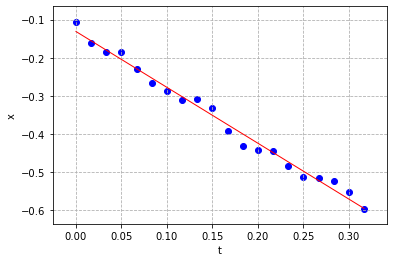

In [17]:
print("Equação: f(t) = (" + str(coefficients_array_X_linear[0]) + ") + (" + str(coefficients_array_X_linear[1]) + ")*t")
print("Valor do MSE: " + str(get_MSE(coefficients_array_X_linear, time_stamps, output_values_X)))
plot_2D_regression(time_stamps, output_values_X, 0, (1/60)*19, coefficients_array_X_linear, "t", "x")

Repetimos o procedimento, obtendo uma equação de segundo grau.

Equação: f(t) = (-0.12105476571694875) + (-1.6577678035480514)*t + (0.592321404319561)*t^2
Valor do MSE: 0.00020430465262684673


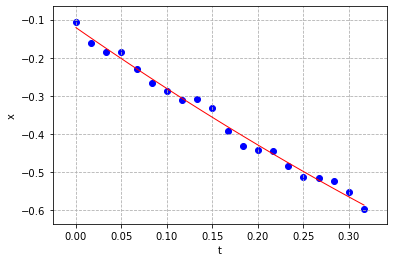

In [18]:
degree = 2
coefficients_array_X_poly, n_iterations = get_regression(time_stamps, output_values_X, degree, learning_rate, tolerance)
print("Equação: f(t) = (" + str(coefficients_array_X_poly[0]) + ") + (" + str(coefficients_array_X_poly[1]) + ")*t + (" + str(coefficients_array_X_poly[2]) + ")*t^2")
print("Valor do MSE: " + str(get_MSE(coefficients_array_X_poly, time_stamps, output_values_X)))
plot_2D_regression(time_stamps, output_values_X, 0, (1/60)*19, coefficients_array_X_poly, "t", "x")

Observe que embora ambas as equações estejam aparentemente bem ajustadas à distribuição dos pontos, **a equação de segundo grau** apresentou valor de MSE ligeiramente menor que a equação linear. Por essa razão, escolhemos **a equação de segundo grau para predizer a trajetória na coordenada $x$**.

Agora, repetiremos esse procedimento para a dimensão $Y$. Primeiro obtemos uma equação linear.

Equação: f(t) = (2.0502736708551885) + (-2.991397946824788)*t
Valor do MSE: 0.00011480003601208883


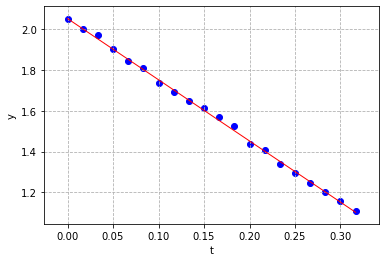

In [19]:
degree = 1
coefficients_array_Y_linear, n_iterations = get_regression(time_stamps, output_values_Y, degree, learning_rate, tolerance)
print("Equação: f(t) = (" + str(coefficients_array_Y_linear[0]) + ") + (" + str(coefficients_array_Y_linear[1]) + ")*t")
print("Valor do MSE: " + str(get_MSE(coefficients_array_Y_linear, time_stamps, output_values_Y)))
plot_2D_regression(time_stamps, output_values_Y, 0, (1/60)*19, coefficients_array_Y_linear, "t", "y")

Agora, obtemos uma equação de segundo grau.

Equação: f(t) = (2.047622208858546) + (-2.938865564602183)*t + (-0.16518062521443866)*t^2
Valor do MSE: 0.00011820151586599008


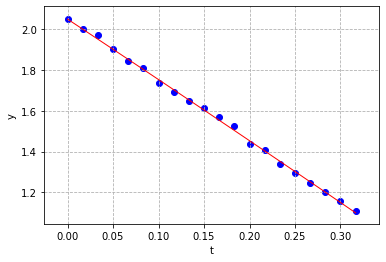

In [20]:
degree = 2
coefficients_array_Y_poly, n_iterations = get_regression(time_stamps, output_values_Y, degree, learning_rate, tolerance)
print("Equação: f(t) = (" + str(coefficients_array_Y_poly[0]) + ") + (" + str(coefficients_array_Y_poly[1]) + ")*t + (" + str(coefficients_array_Y_poly[2]) + ")*t^2")
print("Valor do MSE: " + str(get_MSE(coefficients_array_Y_poly, time_stamps, output_values_Y)))
plot_2D_regression(time_stamps, output_values_Y, 0, (1/60)*19, coefficients_array_Y_poly, "t", "y")

Observe que embora ambas as equações estejam aparentemente bem ajustadas à distribuição dos pontos, **a equação linear** apresentou valor de MSE ligeiramente menor que a equação de segundo grau. Por essa razão, escolhemos **a equação linear para predizer a trajetória na coordenada $y$**.

Agora, repetiremos esse procedimento para a dimensão $Z$. Primeiro obtemos uma equação linear.

Equação: f(t) = (0.16927798480464698) + (0.4333180288506153)*t
Valor do MSE: 0.0002930513940687718


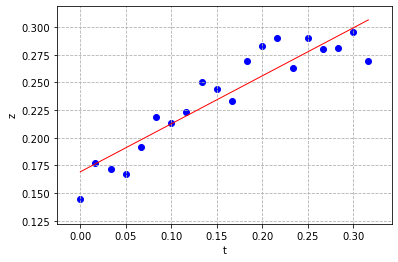

In [21]:
degree = 1
coefficients_array_Z_linear, n_iterations = get_regression(time_stamps, output_values_Z, degree, learning_rate, tolerance)
print("Equação: f(t) = (" + str(coefficients_array_Z_linear[0]) + ") + (" + str(coefficients_array_Z_linear[1]) + ")*t")
print("Valor do MSE: " + str(get_MSE(coefficients_array_Z_linear, time_stamps, output_values_Z)))
plot_2D_regression(time_stamps, output_values_Z, 0, (1/60)*19, coefficients_array_Z_linear, "t", "z")

Agora, obtemos uma equação de segundo grau.

Equação: f(t) = (0.14734260721891967) + (0.8509485150703293)*t + (-1.2902560055088552)*t^2
Valor do MSE: 0.0001438530522472063


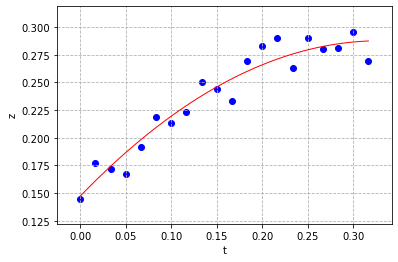

In [22]:
degree = 2
coefficients_array_Z_poly, n_iterations = get_regression(time_stamps, output_values_Z, degree, learning_rate, tolerance)
print("Equação: f(t) = (" + str(coefficients_array_Z_poly[0]) + ") + (" + str(coefficients_array_Z_poly[1]) + ")*t + (" + str(coefficients_array_Z_poly[2]) + ")*t^2")
print("Valor do MSE: " + str(get_MSE(coefficients_array_Z_poly, time_stamps, output_values_Z)))
plot_2D_regression(time_stamps, output_values_Z, 0, (1/60)*19, coefficients_array_Z_poly, "t", "z")

Nesse caso, **a equação de segundo grau** apresentou valor de MSE bem menor do que a equação linear. Por essa razão, escolhemos **a equação de segundo grau para predizer a trajetória na coordenada $z$**.

Portanto, para as dimensões $X$ e $Z$ equações de segundo grau foram escolhidas, e para predizer a dimensão $Y$ uma linear foi escolhida. Utilizaremos as três equações para predizer a trajetória tridimensional da bola desde $t = 0$ até o instante de tempo em que temos $y = 0$. Segue o *plot* da regressão.

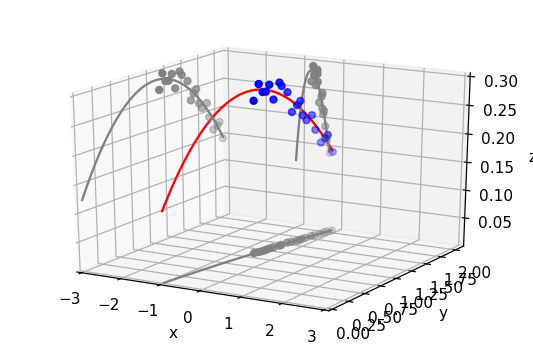

In [23]:
plot_3D_regression(output_values_X, output_values_Y, output_values_Z, coefficients_array_X_poly, coefficients_array_Y_linear, coefficients_array_Z_poly)

Sugundo a predição, o instante de tempo que ocorre $y = 0$ é:

In [24]:
t_max = max(np.roots(np.flip(coefficients_array_Y_linear)))
print("t_max: " + str(t_max))

t_max: 0.6853898101492804


Portanto, as coordenadas da bola nesse instante de tempo são:

In [25]:
print("x: " + str(get_hypothesis_value(coefficients_array_X_poly, t_max)))
print("y: " + str(get_hypothesis_value(coefficients_array_Y_linear, t_max)))
print("z: " + str(get_hypothesis_value(coefficients_array_Z_poly, t_max)))

x: -0.9790235016498929
y: 0.0
z: 0.12446442997399221


Seguindo as mesmas medidas apresentadas na Seção 2.1, temos que a largura entre as traves é de aproximadamente 3 metros e sabemos que o goleiro está no centro do gol. Assumimos que a altura da baliza é de 1 metro e que até o momento de chegada da bola em $y = 0$, o goleiro consegue se mover até 1.5 metros horizontalmente e até 0.5 metro de altura.

De acordo com a nossa predição da trajetória da bola, a bola irá em direção ao gol, e o goleiro conseguirá alcançar a bola, pois ela chegará ao gol com 0.97 metros à esquerda do centro do gol, e com altura de 0.12 metros e tais distâncias estão dentro da capacidade de alcance do goleiro.

## 2.3 Taxa de aprendizado

Nesta Seção, discorremos sobre o impacto da taxa de aprendizado na utilização do nosso algoritmo. Para isso, consideraremos o caso em que desejamos predizer a dimensão Z do *dataset* kick2 com uma equação de segundo grau. Aqui, testamos três valores distintos da taxa de aprendizado $\alpha$: 0.5, 0.75 e 0.95. Começamos com $\alpha = 0.5$.

Número de iterações: 66651
Equação: f(t) = (0.15103831930723977) + (0.7809505594236825)*t + (-1.0745226548652154)*t^2
Valor do MSE: 0.000153002546242389


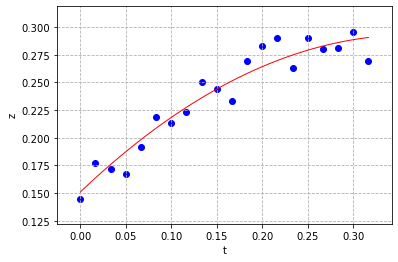

In [26]:
df = pd.read_table("kick2.dat", sep=' ', header=None).to_numpy()
time_stamps = np.linspace(0,(1/60)*19,20)
output_values_X = df[:,0]
output_values_Y = df[:,1]
output_values_Z = df[:,2]
degree = 2

learning_rate = 0.5

coefficients_array_Z_poly, n_iterations = get_regression(time_stamps, output_values_Z, degree, learning_rate, tolerance)
print("Número de iterações: " + str(n_iterations))
print("Equação: f(t) = (" + str(coefficients_array_Z_poly[0]) + ") + (" + str(coefficients_array_Z_poly[1]) + ")*t + (" + str(coefficients_array_Z_poly[2]) + ")*t^2")
print("Valor do MSE: " + str(get_MSE(coefficients_array_Z_poly, time_stamps, output_values_Z)))
plot_2D_regression(time_stamps, output_values_Z, 0, (1/60)*19, coefficients_array_Z_poly, "t", "z")

Em seguida, testamos $\alpha = 0.75$.

Número de iterações: 56745
Equação: f(t) = (0.1484376229534133) + (0.8302085707825415)*t + (-1.2263356005194104)*t^2
Valor do MSE: 0.0001459012368438395


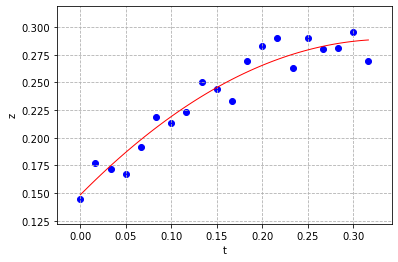

In [27]:
learning_rate = 0.75

coefficients_array_Z_poly, n_iterations = get_regression(time_stamps, output_values_Z, degree, learning_rate, tolerance)
print("Número de iterações: " + str(n_iterations))
print("Equação: f(t) = (" + str(coefficients_array_Z_poly[0]) + ") + (" + str(coefficients_array_Z_poly[1]) + ")*t + (" + str(coefficients_array_Z_poly[2]) + ")*t^2")
print("Valor do MSE: " + str(get_MSE(coefficients_array_Z_poly, time_stamps, output_values_Z)))
plot_2D_regression(time_stamps, output_values_Z, 0, (1/60)*19, coefficients_array_Z_poly, "t", "z")

Por fim, testamos $\alpha = 0.95$ (mesmo valor utilizado na Seção 2.3).

Número de iterações: 50465
Equação: f(t) = (0.14734260721891967) + (0.8509485150703293)*t + (-1.2902560055088552)*t^2
Valor do MSE: 0.0001438530522472063


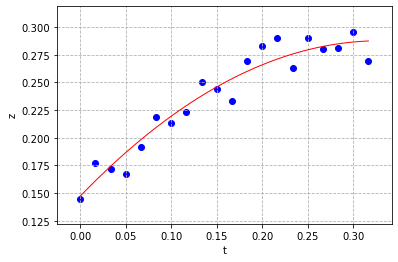

In [28]:
learning_rate = 0.95

coefficients_array_Z_poly, n_iterations = get_regression(time_stamps, output_values_Z, degree, learning_rate, tolerance)
print("Número de iterações: " + str(n_iterations))
print("Equação: f(t) = (" + str(coefficients_array_Z_poly[0]) + ") + (" + str(coefficients_array_Z_poly[1]) + ")*t + (" + str(coefficients_array_Z_poly[2]) + ")*t^2")
print("Valor do MSE: " + str(get_MSE(coefficients_array_Z_poly, time_stamps, output_values_Z)))
plot_2D_regression(time_stamps, output_values_Z, 0, (1/60)*19, coefficients_array_Z_poly, "t", "z")

Podemos observar que nos três casos, os coeficientes do polinômio são bastantes semelhantes, assim como o *plot* das regressões. A principal diferença entre os testes está na quantidade de iterações que foram necessárias para levar o algoritmo à convergência dos valores dos coeficientes. À medida que aumentamos o valor de $\alpha$, a quantidade de iterações utilizada pelo algoritmo diminuiu. Esse comportamente é esperado, tendo em vista que, como vimos em aula, o valor de $\alpha$ representa o tamamnho do "passo" que é dado no espaço de busca de soluções na direção de um mínimo local. Portanto, quanto maior o valor de $\alpha$, uma menos quantidade de passos é necessária e a convergência se dará de maneira mais rápida.

Por outro lado, observe que é possível que algoritmo apresente um comportamento que leve a uma divergência, ao invés de convergir. Isso ocorre se tomarmos um valor de $\alpha$ demasiadamente alto. Antes de conduzir os experimentos das Seções 2.1 e 2.2, fizemos testes preliminares em relação ao valor da taxa de aprendizado. Verificamos que, em linhas gerais, $\alpha = 0.95$ mostrou-se ser um valor que leva a uma rápida execução, sem sofrer com divergência. Por isso tal valor foi escolhido em todas as execuções.

# 3 *Parte $II$ - Tarefa de Classificação*

Nesta seção, realizamos a tarefa de classificação de dígitos de 0 a 9 escritos à mão.
Nós utilizamos o dataset disponível no módulo *datasets* do *sklearn*. Após carregar o dataset, nós o dividimos em dois conjuntos: um de treinamento (*training set*) e outro de teste (*test set*), na proporção 90% para treinamento e 10% para teste.
Na etapa de pré-processamento, realizamos a normalização dos dados, bem como uma randomização das *features*. Para plotar a distruibuição dos dados em 2D, utilizamos o método de visualização t-SNE. Em seguida, realizamos o treinamento em si. Os algoritmos utilizados para a tarefa de classificação foram SVC, para uma *SVM (Support Vector Machine)*, e *k-nearest neighbors*. Para ambos, utilizamos a acurácia como métrica de avaliação da qualidade da classificação final produzida. A seguir, apresentamos mais detalhes sobre cada um dos algoritmos.

### Support Vector Machines (SVM)
À princípio, uma SVM classifica as amostras somente entre duas classes distintas.
Em suma, uma SVM funciona da seguinte forma. Dado um conjunto de dados categorizados em uma entre duas classes, um algoritmo de SVM mapeia as amostras do conjunto de treinamento no plano, maximizando a margem de distência entre items de cada categoria, obtendo assim um modelo de classificação. Uma vez que o modelo está treinado, o algoritmo deve ser executado sobre um novo conjunto de dados (ainda não classificados e não usados para o treinamento) e, para cada amostra, o algoritmo a classifica dependendo de em que lado da linha de sepração das classes a amostra caiu.

Aqui, utilizamos particularmente o método SCV do *sklearn* para implementar uma SVM. Os hiperparâmetros desse método que nós ajustamos foram o 'C' e o 'gamma'. O parêmetro 'C' ajuda a equilibrar o "achatamento" da curva com a acurácia do modelo. Já o parâmetro 'gamma' determina o quão distante da linha de separação entre as classes estão os elementos que mais impactam na definição da curva mais adequada. Quanto menor o valor de gamma, mais amostras impactarão a definição da curva, até mesmo amostras bastante distantes da linha de separação. Por outro lado, quanto maior o valor de gamma, menos amostras serão consideradas, em geral, as mais pŕoximas da linha de separação.

Em nossos experimentos, consideramos quatro valores de 'C' e, para cada um deles, executamos com dois valores distintos de gamma. Os resultados são apresentados mais adiante nesta seção.

### k-nearest neighbors (kNN)
O kNN encontra, para cada amostra, as $k$ amostras mais perto dela. Uma vez obtido o modelo, o algoritmo deve ser executado sobre um novo conjunto de dados (ainda não classificados e não usados para o treinamento) e o critério de classificação é o seguinte: dada uma amostra, são encontrados as $k$ amostras já classificadas mais próximas e, então, a amostra sendo atualmente analisada recebe o label mais comum em sua vizinhança, isto é, o label comum à maioria das amostras em sua vizinhança.
O principal parâmetro é o valor $k$. Em nossos experimentos, consideramos também quatro valores distintos para $k$.

Em ambos os algoritmos, para encontrar os melhores valores para os parâmetros em aberto, utilizamos a técnica de *cross validation* com o método de treinamento *k-fold*.

In [29]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import svm, neighbors
import random

In [30]:
seed = 36516285968928
random.seed(seed)

Primeiramente, obtivemos o conjunto de dígitos fornecido pelo *sklearn*. Em seguida, normalizamos os dados e randomizamos a distribuição das amostras.

In [31]:
dataset = load_digits() 

dataset.data = normalize(dataset.data) #Normaliza as features
dataset.data, dataset.target = shuffle(dataset.data, dataset.target) #Randomiza os elementos do dataset

Agora, plotamos a distribuição das amostras. Note que, cada amostra tem $64$ *features*, o que implicaria, à princípio, analisar a distribuição em um espaço $64$-dimensional. Contudo, como não é posível plotar em um espaço $64$-dimensional, nós utilizamos a ferramenta t-SNE para reduzir a dimensionalidade das amostras para $2$ *features* e, assim, podermos plotar a distribuição no plano (bidimensional).

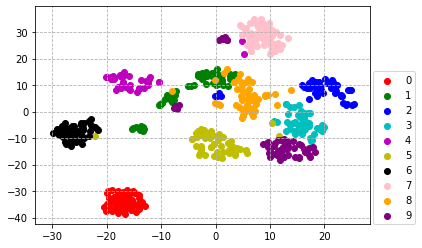

In [32]:
# Adaptado de https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_tsne.html
samples = dataset.data[:500]
targets = dataset.target[:500]
tsne = TSNE(n_components=2, random_state=0) 
samples_2d = tsne.fit_transform(samples)
target_ids = range(len(dataset.target_names))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'pink', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, dataset.target_names):
    plt.scatter(samples_2d[targets == i, 0], samples_2d[targets == i, 1], c=c, label=label)
plt.grid(linestyle='--')
plt.legend(bbox_to_anchor=(1.15, 0.725, 0, 0))
plt.show()
plt.close()

Em seguida, dividimos o *dataset* em conjunto de treinamento e conjunto de teste, na proporção 90% e 10% respectivamente. O conjunto de treinamento ficou com $1617$ amostras, enquanto o conjunto de teste fico com $180$ amostras.

In [33]:
training_set, test_set, training_targets, test_targets = train_test_split(dataset.data, dataset.target, test_size=0.10, random_state=0)

Por ser uma abordagem muito comum na prática, utilizamos o *k-fold* como método de avaliação cruzada. Escolhemos $k=47$, mas poderia ser qualquer outro múltiplo de $1617$. A seguir, setamos a variável que determina o valor de $k$ para o *k-fold*.

In [34]:
n_folds = 47 # Outros valores possíveis: 1, 3, 7, 11, 21, 33, 49, 77, 147, 231, 539, 1617 (divisores de 1617)

### 3.1 SVM 
Primeiramente, executamos o algoritmo SVC. Rodamos o algoritmo três vezes, uma vez com um valor diferente do hiperparâmetro C. Os valores de C foram $0.01$, $0.01$, $1$ e $2$. Para cada um desses valores, executamos o algoritmo com o parâmetro gamma igual a 'scale' (que é o padrão) e também igual a 'auto'.
Por fim, para cada combinação de hiperparâmetros, imprimimos a acurácia e o desvio padrão obtidos.

In [35]:
svm_1_auto = svm.SVC(C=0.01, random_state=0, gamma='auto')
scores = cross_val_score(svm_1_auto, training_set, training_targets, cv=n_folds, scoring='accuracy')
print("C=0.01 e gamma=auto: ")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
svm_1 = svm.SVC(C=0.01, random_state=0)
scores = cross_val_score(svm_1, training_set, training_targets, cv=n_folds, scoring='accuracy')
print("C=0.01 e gamma=scale: ")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("\n")

svm_2_auto = svm.SVC(C=0.1, random_state=0, gamma='auto')
scores = cross_val_score(svm_2_auto, training_set, training_targets, cv=n_folds, scoring='accuracy')
print("C=0.1 e gamma=auto: ")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
svm_2 = svm.SVC(C=0.1, random_state=0)
scores = cross_val_score(svm_2, training_set, training_targets, cv=n_folds, scoring='accuracy')
print("C=0.1 e gamma=scale: ")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("\n")

svm_3_auto = svm.SVC(C=1, random_state=0, gamma='auto')
scores = cross_val_score(svm_3_auto, training_set, training_targets, cv=n_folds, scoring='accuracy')
print("C=1.0 e gamma=auto: ")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
svm_3 = svm.SVC(C=1, random_state=0)
scores = cross_val_score(svm_3, training_set, training_targets, cv=n_folds, scoring='accuracy')
print("C=1.0 e gamma=scale: ")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("\n")

svm_4_auto = svm.SVC(C=2, random_state=0, gamma='auto')
scores = cross_val_score(svm_3_auto, training_set, training_targets, cv=n_folds, scoring='accuracy')
print("C=2.0 e gamma=auto: ")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
svm_4 = svm.SVC(C=2, random_state=0)
scores = cross_val_score(svm_4, training_set, training_targets, cv=n_folds, scoring='accuracy')
print("C=2.0 e gamma=scale: ")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("\n")

C=0.01 e gamma=auto: 
0.11 accuracy with a standard deviation of 0.01
C=0.01 e gamma=scale: 
0.31 accuracy with a standard deviation of 0.03


C=0.1 e gamma=auto: 
0.11 accuracy with a standard deviation of 0.01
C=0.1 e gamma=scale: 
0.95 accuracy with a standard deviation of 0.03


C=1.0 e gamma=auto: 
0.73 accuracy with a standard deviation of 0.05
C=1.0 e gamma=scale: 
0.99 accuracy with a standard deviation of 0.02


C=2.0 e gamma=auto: 
0.73 accuracy with a standard deviation of 0.05
C=2.0 e gamma=scale: 
0.99 accuracy with a standard deviation of 0.02




Como podemos observar, o SVC obteve melhor acurácia com $C=1$ e $C=2$, ambos com gamma igual a 'scale'. Assim, escolhemos o menor valor de $C$ e, portanto, treinamos o conjunto de treinamento inteiro, sem validação, utilizando $C=1$ e gamma igual a 'scale'. Uma vez obtido o modelo treinado, o aplicamos no conjunto de testes. Em seguida, imprimimos um relatório da qualidade das predições, bem como a matriz de confusão relativa às predições realizadas pelo modelo treinado.

Classification report for classifier SVC(C=1, random_state=0):
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.96      1.00      0.98        26
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        14
           8       0.94      0.94      0.94        16
           9       1.00      0.94      0.97        17

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180




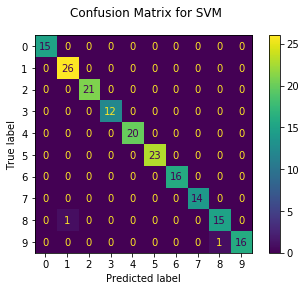

In [36]:
# Treinamento do conjunto de treinamento inteiro, sem validação
svm_final = svm.SVC(C=1, random_state=0)
svm_final.fit(training_set, training_targets)

# Aplicação do modelo treinando no test set
svm_prediction = svm_final.predict(test_set)

# Impressão da qualidade das predições
print(f"Classification report for classifier {svm_final}:\n--------------------------------------------------------------\n"
      f"{metrics.classification_report(test_targets, svm_prediction)}\n")

# Impressão da matriz de confusão
disp = metrics.plot_confusion_matrix(svm_final, test_set, test_targets)
disp.figure_.suptitle("Confusion Matrix for SVM")
#print(f"Confusion matrix for SVM:\n{disp.confusion_matrix}")
plt.show()
plt.close()

Podemos concluir que o SVC teve um desempenho muito bom. Pela matriz de confusão, pode-se observar que o modelo errou somente três vezes: confundiu um dígito 8 com um dígito 1; um dígito 9 com um dígito 5; e um dígito 7 com um dígito 9.

### 3.2 k-nearest neighbors 
Agora, executamos o algoritmo k-nearest neighbors. Rodamos o algoritmo também quatro vezes, uma vez com um valor diferente para o parâmetro $k$. Os valores de $k$ foram $5$, $10$, $25$ e $50$. Para cada um deles, imprimimos a acurácia e o desvio padrão obtidos.

In [37]:
knn_1 = neighbors.KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn_1, training_set, training_targets, cv=n_folds, scoring='accuracy')
print("k=5: ")
print("%0.2f accuracy with a standard deviation of %0.2f\n" % (scores.mean(), scores.std()))

knn_4 = neighbors.KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(knn_4, training_set, training_targets, cv=n_folds, scoring='accuracy')
print("k=10: ")
print("%0.2f accuracy with a standard deviation of %0.2f\n" % (scores.mean(), scores.std()))

knn_2 = neighbors.KNeighborsClassifier(n_neighbors=25)
scores = cross_val_score(knn_2, training_set, training_targets, cv=n_folds, scoring='accuracy')
print("k=25: ")
print("%0.2f accuracy with a standard deviation of %0.2f\n" % (scores.mean(), scores.std()))

knn_3 = neighbors.KNeighborsClassifier(n_neighbors=50)
scores = cross_val_score(knn_3, training_set, training_targets, cv=n_folds, scoring='accuracy')
print("k=50: ")
print("%0.2f accuracy with a standard deviation of %0.2f\n" % (scores.mean(), scores.std()))

k=5: 
0.99 accuracy with a standard deviation of 0.02

k=10: 
0.98 accuracy with a standard deviation of 0.02

k=25: 
0.97 accuracy with a standard deviation of 0.03

k=50: 
0.95 accuracy with a standard deviation of 0.04



Como podemos observar, o k-nearest neighbors obteve melhor acurácia com $k=5$. Então, assim como fizemos com o SVC, treinamos o conjunto de treinamento inteiro, sem validação, utilizando justamente $k=5$. Uma vez obtido o modelo treinado, o aplicamos no conjunto de testes. Em seguida, imprimimos um relatório da qualidade das predições, bem como a matriz de confusão relativa às predições realizadas pelo modelo treinado.

Classification report for classifier KNeighborsClassifier():
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      1.00      0.96        26
           2       1.00      1.00      1.00        21
           3       0.92      1.00      0.96        12
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        16
           9       1.00      0.82      0.90        17

    accuracy                           0.98       180
   macro avg       0.99      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180




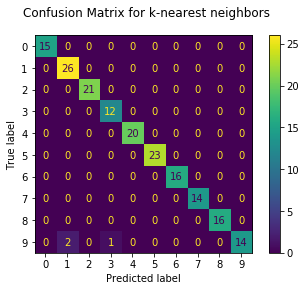

In [38]:
# Treinamento do conjunto de treinamento inteiro, sem validação
knn_final = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_final.fit(training_set, training_targets)

# Aplicação do modelo treinando no test set
knn_prediction = knn_final.predict(test_set)

# Impressão da qualidade das predições
print(f"Classification report for classifier {knn_final}:\n------------------------------------------------------------\n"
      f"{metrics.classification_report(test_targets, knn_prediction)}\n")

# Impressão da matriz de confusão
disp = metrics.plot_confusion_matrix(knn_final, test_set, test_targets)
disp.figure_.suptitle("Confusion Matrix for k-nearest neighbors")
#print(f"Confusion matrix  for k-nearest neighbors:\n{disp.confusion_matrix}")
plt.show()
plt.close()

Como podemos observar pela matriz de confusão, o k-nearest neighbors, assim como o SVC, errou três vezes. Ele confundiu: 8 com 1, 9 com 5 e 7 com 9. Note que ambos os algoritmos cometeram as mesmas confusões. Isso mostra que, com os parâmetros adequadamente ajustados, ambos os algoritmos obteveram muito boa acurácia. Uma diferença que notamos foi em relação ao desempenho de tempo. O k-nearest neighbors apresentou um tempo de execução bastante mais rápido que o SVC, o que pode ser considerado uma vantagem do k-nearest neighbors. 
Além disso, notamos que o k-nearest neighbors tem uma implementação mais simples. Por exemplo, para ele foi preciso ajustar somente um parâmetro, enquanto para o SVC foi preciso testar combinações de dois parâmetros. Notamos que o SVC com o parâmetro gamma igual a 'auto' apresentou resultados muito piores em relação ao valor 'scale', isso para todos os valores de $C$. Uma conclusão que tiramos para futuros experimentos é utilizar gamma igual a 'scale'.

### 3.3 Eliminado  a normalização

Nesta subseção, testamos o impacto que a normalização do  dataset inicial teve no desempenho de ambos os algoritmos. Aqui, eliminamos a etapa de normalização no pré-processamento e, em seguida, rodamos cada um dos algoritmos para os melhores valores dos hiperparâmetros encontrados nas subseções anteriores. Também eliminamos a randomização da distribuição dos dados. Finalmente, para manter uma base mais consistente de comparação com os resultados anteriores, mantivemos a mesma semente e o mesmo valor de k para o *k-fold*.

Distribuição das amostras em 2D


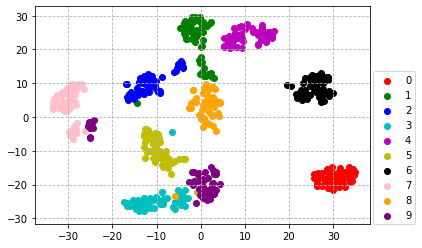


Execução do SVC
Classification report for classifier SVC(C=1, random_state=0):
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.95      1.00      0.98        20
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       0.95      1.00      0.98        21
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        20
           8       1.00      0.96      0.98        23
           9       1.00      0.96      0.98        24

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180




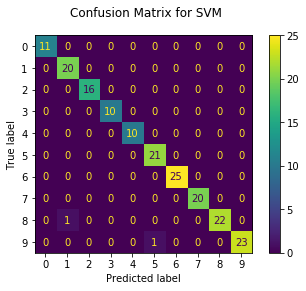


Execução do k-nearest neighbors
Classification report for classifier KNeighborsClassifier():
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.95      1.00      0.98        20
           2       1.00      0.94      0.97        16
           3       0.77      1.00      0.87        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        25
           7       0.95      1.00      0.98        20
           8       1.00      0.83      0.90        23
           9       1.00      1.00      1.00        24

    accuracy                           0.97       180
   macro avg       0.97      0.98      0.97       180
weighted avg       0.98      0.97      0.97       180




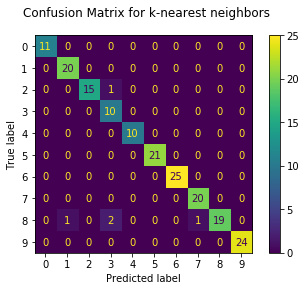

In [39]:
seed = 36516285968928
random.seed(seed)

dataset = load_digits() 

#dataset.data = normalize(dataset.data) #Normaliza as features
#dataset.data, dataset.target = shuffle(dataset.data, dataset.target) #Randomiza os elementos do dataset

# Impressão da distribuição das amostras, com dimensionalidades reduzida pra 2d.
print("Distribuição das amostras em 2D")
samples = dataset.data[:500]
targets = dataset.target[:500]
tsne = TSNE(n_components=2, random_state=0) 
samples_2d = tsne.fit_transform(samples)
target_ids = range(len(dataset.target_names))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'pink', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, dataset.target_names):
    plt.scatter(samples_2d[targets == i, 0], samples_2d[targets == i, 1], c=c, label=label)
plt.grid(linestyle='--')
plt.legend(bbox_to_anchor=(1.15, 0.725, 0, 0))
plt.show()
plt.close()

# Divisão do dataset
training_set, test_set, training_targets, test_targets = train_test_split(dataset.data, dataset.target, test_size=0.10, random_state=0)

# Definição do k para o k-fold
n_folds = 47

# Execução do SVC
print("\nExecução do SVC")
# Treinamento do conjunto de treinamento inteiro, sem validação
svm_final = svm.SVC(C=1, random_state=0)
svm_final.fit(training_set, training_targets)

# Aplicação do modelo treinando no test set
svm_prediction = svm_final.predict(test_set)

# Impressão da qualidade das predições
print(f"Classification report for classifier {svm_final}:\n--------------------------------------------------------------\n"
      f"{metrics.classification_report(test_targets, svm_prediction)}\n")

# Impressão da matriz de confusão
disp = metrics.plot_confusion_matrix(svm_final, test_set, test_targets)
disp.figure_.suptitle("Confusion Matrix for SVM")
#print(f"Confusion matrix for SVM:\n{disp.confusion_matrix}")
plt.show()
plt.close()

# Execução do KNN
print("\nExecução do k-nearest neighbors")
# Treinamento do conjunto de treinamento inteiro, sem validação
knn_final = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_final.fit(training_set, training_targets)

# Aplicação do modelo treinando no test set
knn_prediction = knn_final.predict(test_set)

# Impressão da qualidade das predições
print(f"Classification report for classifier {knn_final}:\n------------------------------------------------------------\n"
      f"{metrics.classification_report(test_targets, knn_prediction)}\n")

# Impressão da matriz de confusão
disp = metrics.plot_confusion_matrix(knn_final, test_set, test_targets)
disp.figure_.suptitle("Confusion Matrix for k-nearest neighbors")
#print(f"Confusion matrix  for k-nearest neighbors:\n{disp.confusion_matrix}")
plt.show()
plt.close()


Podemos observar que, sem a normalização, a distribuição das amostras foi um pouco diferente. 
No entanto, o desempenho de ambos os algoritmos não pirou significativamente.
O SVC apresentou duas classificações erradas, ele confundiu os seguintes dígitos: 8 com um 1 e 9 com 5. Note que sem a normalização o SVC teve um erro a menos quando comparado com quando ocorreu a normalização. Apesar disso, julgamos que a diferença não foi significativa.
Já o k-nearest neighbors apresentou mais erros sem a normalização. Com a normalização foram três erros, enquanto que sem a normalização foram cinco erros, os quais: uma vez 8 com 1, uma vez 2 com 3, duas vezes 8 com 3 e uma vez 8 com 7. Apesar de ter errado mais vezes sem a normalização, julgamos que a diferença também não foi muito significativa.
Acreditamos que essa diferença não significativa se deve ao fato de as amostras já estarem todas padronizadas em 16 bits.

# 4 *Considerações Finais*

Neste *notebook*, apresentamos as definições dos problemas explorados, os métodos utilizados para resolvê-los, assim como os resultados obtidos, de acordo com a especificação do projeto. Em particular, destacamos os seguintes pontos que foram exibidos no relatório.

A execução da Parte $I$ é relatada na Seção 2. Nessa Seção, descrevemos o problema de predição da trajetória da bola e apresentamos um algoritmo baseado no método do gradiente descendente para solucionar tal problema. Além disso, fizemos o que segue.

* Definimos regressões para aprender os nossos modelos por meio do método do gradiente descendente, implementado a partir "do zero";
* Treinamos regressões (linear e de segundo grau) em cada *dataset* (Seções 2.1 e 2.2):
    * Derivamos uma equação linear e uma polinomial para explicar a trajetória da bola em cada dimensão em função do tempo;
    * Avaliamos e escolhemos as equações que melhor explicam os dados e combinamos as melhores equações para predizer a trajetória em três dimensões;
* Avaliamos o impacto da complexidade dos modelos (em relação ao grau do polinômio) por meio de métrica previamente estabelecida (MSE);
* Avaliamos o impacto da taxa de aprendizado (Seção 2.3);
* Utilizamos *plots* 2D e 3D para auxiliar na apresentação e discussão dos resultados.

Portanto, cumprimos todas as tarefas previstas na especificação do projeto relativa à Parte $I$.

Na Seção 3, implementamos o algoritmo k-nearest neighbors e uma Support Vector Machine (SVM), usando para a última o algoritmo SVC do *sklearn*. Nossos experimentos seguiram as seguintes etapas.
* Carregamos o dataset de dígitos disponibilizado pelo módulo *datasets* do *sklearn*;
* Dividimos o dataset em conjuntos de treinamento e conjunto de test na proporção dita no enunciado da tarefa (90/10);
* Normalizamos os dados, em seguida, aplicamos o método t-SNE para diminuição da dimensionalidade do dataset e plotamos a distribução das amostras em 2D;
* Treinamos, usando a técnica de *cross-validation* juntamente com o método *k-fold*, dois algoritmos de aprendizado supervisionado: o SVC para uma SVM e o k-nearest neighbors;
* Testamos diferentes valores para os parâmetros e, usando os valores que apresentaram melhor acurácia, classificamos o conjunto de testes. Em seguida, plotamos as matrizes de confusão para auxiliar na análise do desempenho de ambos os algoritmos;
* Testamos o desempenhos dos algoritmos sem realizar a etapa de pré-processamento dos dados e discutimos o impacto gerado por isso.
 
Assim, cumprimos todas as tarefas previstas na especificação do projeto relativa à Parte $II$.

Além disso, de modo geral, discutimos:

* A qualidade dos resultados em cada tarefa (Partes $I$ e $II$)
* As vantagens e desvantagens de cada método (Parte $II$)

Ambos discentes participaram ativamente durante todo o projeto. O aluno Felipe focou os seus esforços na Parte $I$ do projeto, enquanto a aluna Elisa esteve mais envolvida com a Parte $II$. Contudo, as pesquisas, revisões de código e tomadas de decisão foram sempre feitas em conjunto. 

# 5 Referências Bibliográficas

[1] ALPAYDIN, E. Introduction to Machine Learning. MIT Press, 3rd edition, 2014.

[2] BISHOP, C. M. Pattern Recognition and Machine Learning. Springer. Cambridge, 2007.

[3] MARSLAND, S. Machine Learning: an algorithm perspective. CRC Press, 2nd edition, 2015.

[4] https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html, visitado em 29/04/2021.

[5] https://towardsdatascience.com/overview-of-supervised-learning-model-svm-support-vector-machines-20b683a4eaf, visitado em 30/05/2021.

[6] https://en.wikipedia.org/wiki/Support-vector_machine#Nonlinear_classification, visitado em 30/05/2021.

[7] https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC, visitado em 31/05/2021.